In [3]:
# 1. 📦 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 2. 📂 Load Dataset
from google.colab import files
uploaded = files.upload()  # Upload M2_UPDATED.csv

df = pd.read_csv('final_employee_data.csv')

Saving final_employee_data.csv to final_employee_data (2).csv


📋 Columns in the uploaded dataset:
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'SatisfactionIndex', 'WorkBalanceScore', 'Overworked', 'Bonus', 'PerformanceScore', 'EngagementScore', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'JobRole

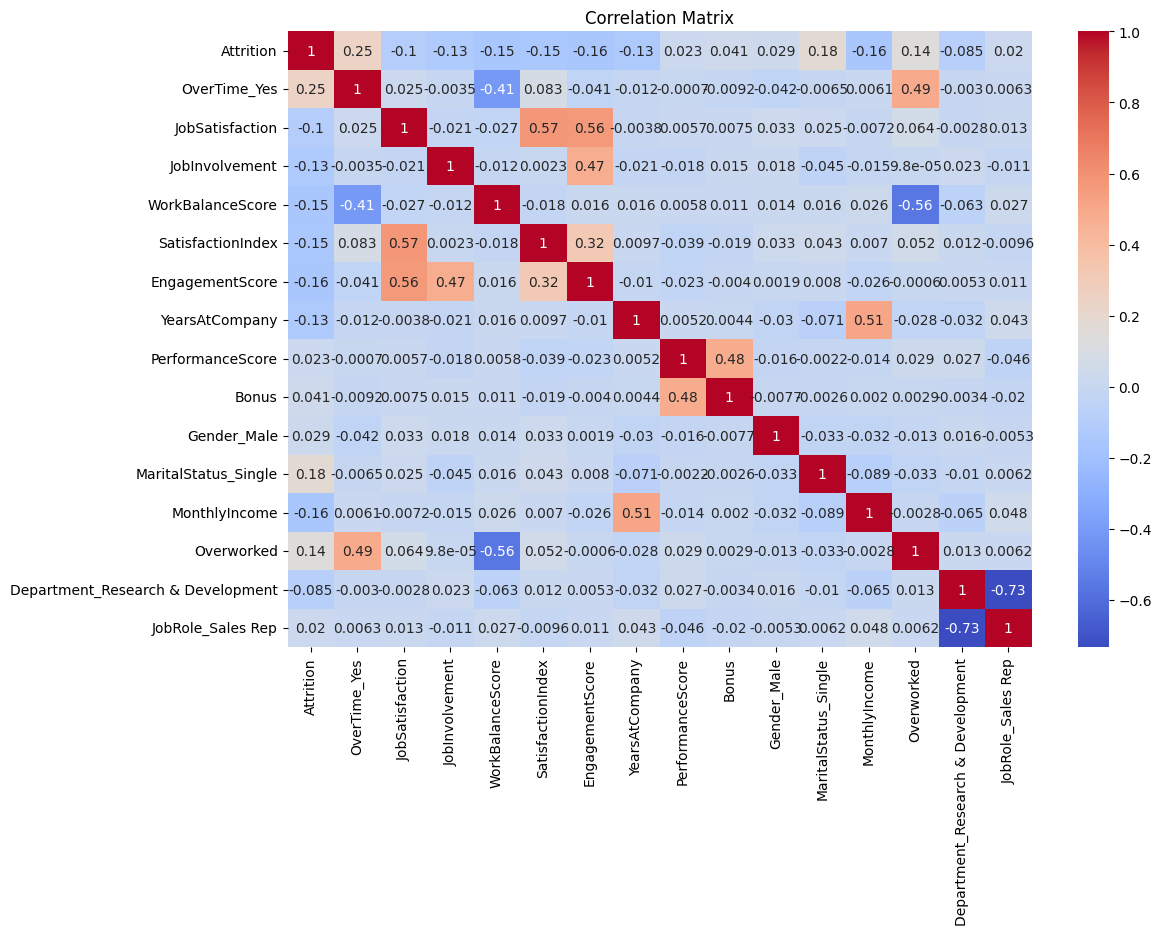


📉 Variance Inflation Factors (VIF):
                              Feature       VIF
1                     JobSatisfaction  2.247820
5                     EngagementScore  2.238892
13  Department_Research & Development  2.183226
14                  JobRole_Sales Rep  2.174491
12                         Overworked  1.656786
2                      JobInvolvement  1.532974
3                    WorkBalanceScore  1.522968
4                   SatisfactionIndex  1.513095
0                        OverTime_Yes  1.381522
11                      MonthlyIncome  1.373760
6                      YearsAtCompany  1.365837
7                    PerformanceScore  1.308018
8                               Bonus  1.301147
10               MaritalStatus_Single  1.016597
9                         Gender_Male  1.008642


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 Final selected features:
['Attrition', 'OverTime_Yes', 'JobSatisfaction', 'JobInvolvement', 'WorkBalanceScore', 'SatisfactionIndex', 'EngagementScore', 'YearsAtCompany', 'PerformanceScore', 'Bonus', 'Gender_Male', 'MaritalStatus_Single', 'MonthlyIncome', 'Overworked', 'Department_Research & Development', 'JobRole_Sales Rep']


In [4]:
# 3. 📋 Check actual column names
print("📋 Columns in the uploaded dataset:")
print(df.columns.tolist())

# 4. ✅ Feature list (remove 'TenureCategory' if not present)
selected_features = [
    'Attrition', 'OverTime_Yes', 'JobSatisfaction', 'JobInvolvement',
    'WorkBalanceScore', 'SatisfactionIndex', 'EngagementScore',
    'YearsAtCompany', 'PerformanceScore', 'Bonus',
    'Gender_Male', 'MaritalStatus_Single', 'MonthlyIncome',
    'Overworked', 'Department_Research & Development', 'JobRole_Sales Rep'
]

# 5. 🔍 Keep only valid columns
valid_features = [col for col in selected_features if col in df.columns]
missing_cols = list(set(selected_features) - set(valid_features))
print(f"\n❌ Missing columns removed: {missing_cols}")
print(f"✅ Using valid features: {valid_features}")

df = df[valid_features].dropna()

# 6. 🔥 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 7. 💡 VIF Analysis
X = df.drop(columns=['Attrition'])  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("\n📉 Variance Inflation Factors (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))

# 8. ✅ Final Feature Selection based on VIF < 10
final_features = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()
final_df = df[['Attrition'] + final_features]

# 9. 💾 Export Final Features
final_df.to_csv("selected_features.csv", index=False)
files.download("selected_features.csv")

print("\n🎉 Final selected features:")
print(final_df.columns.tolist())

In [8]:
print(f"Rows dropped due to NaN in target: {df['Attrition'].isnull().sum()}")



Rows dropped due to NaN in target: 0


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Read the cleaned data
#df = pd.read_csv('final_employee_data.csv')

# Ensure no NaN values in the target variable 'Attrition' and handle them
df.dropna(subset=['Attrition'], inplace=True)

# Separate features and target variable
X = df[['OverTime_Yes', 'JobSatisfaction', 'JobInvolvement', 'WorkBalanceScore',
        'SatisfactionIndex', 'EngagementScore', 'YearsAtCompany', 'PerformanceScore',
        'Bonus', 'Gender_Male', 'MaritalStatus_Single', 'MonthlyIncome', 'Overworked',
        'Department_Research & Development', 'JobRole_Sales Rep']]
y = df['Attrition']

# Ensure no NaN values in features
X = X.dropna(axis=0)  # Drop rows with NaN values in features

# Stratified Train-Test Split (to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

# List of models to evaluate
models = [log_reg, rf_clf, xgb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)


Results for Logistic Regression:
Accuracy: 0.8843537414965986
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.78      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.84      0.68      0.72       294
weighted avg       0.88      0.88      0.87       294

--------------------------------------------------
Results for Random Forest:
Accuracy: 0.8503401360544217
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.59      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.73      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294

--------------------------------------------------
Results for XGBoost:
Accuracy: 0.8503401360544217
Classification Report:
       

In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# Step 2: Load the dataset and preprocess it
df = pd.read_csv('final_employee_data.csv')

# Select features and target
X = df[['OverTime_Yes', 'JobSatisfaction', 'JobInvolvement', 'WorkBalanceScore', 'SatisfactionIndex',
        'EngagementScore', 'YearsAtCompany', 'PerformanceScore', 'Bonus', 'Gender_Male', 'MaritalStatus_Single',
        'MonthlyIncome', 'Overworked', 'Department_Research & Development', 'JobRole_Sales Rep']]
y = df['Attrition']  # Target variable

# Handle missing values
X = X.copy()  # Make a copy to avoid the SettingWithCopyWarning
X.fillna(X.mean(), inplace=True)  # Fill missing values in features
y.fillna(y.mode()[0], inplace=True)  # Fill missing values in target

# Step 3: Apply SMOTE for resampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Step 5: Initialize models with class weights for imbalance handling
logreg = LogisticRegression(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=1, random_state=42)

# Step 6: Hyperparameter Tuning using GridSearchCV for each model

# Logistic Regression hyperparameters
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)

# Random Forest hyperparameters
#rf_params = {
    #'n_estimators': [100, 200, 300],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_random.fit(X_train, y_train)

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)

#rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
#rf_grid.fit(X_train, y_train)

# XGBoost hyperparameters
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

# Step 7: Evaluate models using classification report, F1, Precision, Recall

# Logistic Regression Evaluation
logreg_best = logreg_grid.best_estimator_
y_pred_logreg = logreg_best.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest Evaluation
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# XGBoost Evaluation
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       247
           1       0.75      0.79      0.77       247

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494

Random Forest Results:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       247
           1       0.93      0.93      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

XGBoost Results:
              precision    recal

In [14]:
pip install imbalanced-learn


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

# Assuming X and y are your features and target variables
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression Model (with class weight to handle imbalance)
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_res, y_train_res)

# Random Forest Model (with class weight to handle imbalance)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)

# XGBoost Model (with class weight to handle imbalance)
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Evaluate models on test set
logreg_preds = logreg.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Classification reports
logreg_report = classification_report(y_test, logreg_preds)
rf_report = classification_report(y_test, rf_preds)
xgb_report = classification_report(y_test, xgb_preds)

# Print results
print("Logistic Regression Results with SMOTE:")
print(logreg_report)
print("-" * 50)

print("Random Forest Results with SMOTE:")
print(rf_report)
print("-" * 50)

print("XGBoost Results with SMOTE:")
print(xgb_report)
print("-" * 50)

# Hyperparameter Tuning (GridSearchCV) for Random Forest & XGBoost
# For Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")

# For XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1],
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")


Logistic Regression Results with SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       247
           1       0.38      0.81      0.52        47

    accuracy                           0.76       294
   macro avg       0.67      0.78      0.68       294
weighted avg       0.86      0.76      0.79       294

--------------------------------------------------
Random Forest Results with SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       247
           1       0.55      0.45      0.49        47

    accuracy                           0.85       294
   macro avg       0.73      0.69      0.70       294
weighted avg       0.84      0.85      0.85       294

--------------------------------------------------
XGBoost Results with SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.49      0.40

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

# Step 1: Handle missing values
X.fillna(X.mean(), inplace=True)  # Filling missing values with column means

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 4: Initialize models
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=len(y_train_res) / sum(y_train_res == 1), random_state=42)

# Step 5: Hyperparameter Tuning using GridSearchCV
log_reg_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15]
}

# GridSearchCV for Logistic Regression
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train_res, y_train_res)

# GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)

# GridSearchCV for XGBoost
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)

# Step 6: Model Evaluation
log_reg_best = log_reg_grid.best_estimator_
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

# Make predictions
log_reg_pred = log_reg_best.predict(X_test)
rf_pred = rf_best.predict(X_test)
xgb_pred = xgb_best.predict(X_test)

# Step 7: Print Evaluation Results
print("Logistic Regression Results with SMOTE:")
print(classification_report(y_test, log_reg_pred))

print("\nRandom Forest Results with SMOTE:")
print(classification_report(y_test, rf_pred))

print("\nXGBoost Results with SMOTE:")
print(classification_report(y_test, xgb_pred))

# Best Hyperparameters
print(f"Best Logistic Regression Parameters: {log_reg_grid.best_params_}")
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Logistic Regression Results with SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       247
           1       0.38      0.81      0.52        47

    accuracy                           0.76       294
   macro avg       0.67      0.78      0.68       294
weighted avg       0.86      0.76      0.79       294


Random Forest Results with SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.57      0.45      0.50        47

    accuracy                           0.86       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.85      0.86      0.85       294


XGBoost Results with SMOTE:
              precision    recall  f1-score   support

     

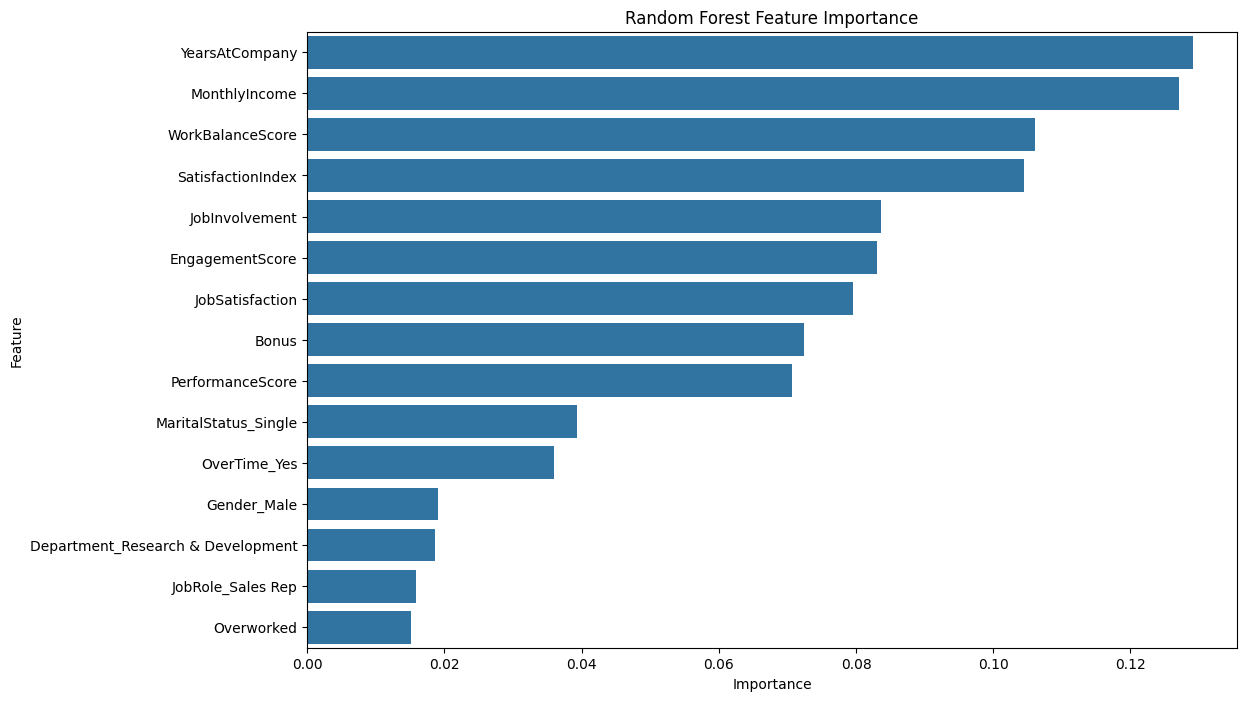

In [17]:
# Random Forest Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Fit Random Forest model (already done in previous steps)
rf_model = rf_grid.best_estimator_

# Feature importance
rf_feature_importance = rf_model.feature_importances_

# Create DataFrame for easy viewing
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()


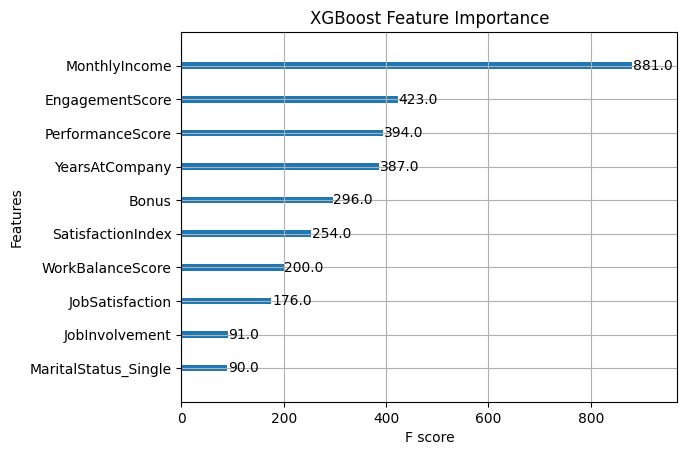

In [18]:
# XGBoost Feature Importance
import xgboost as xgb

# Fit XGBoost model (already done in previous steps)
xgboost_model = xgb.XGBClassifier(learning_rate=0.2, max_depth=15, n_estimators=100)
xgboost_model.fit(X_train, y_train)

# Feature importance plot
xgb.plot_importance(xgboost_model, max_num_features=10, importance_type='weight')
plt.title('XGBoost Feature Importance')
plt.show()


<Figure size 640x480 with 0 Axes>

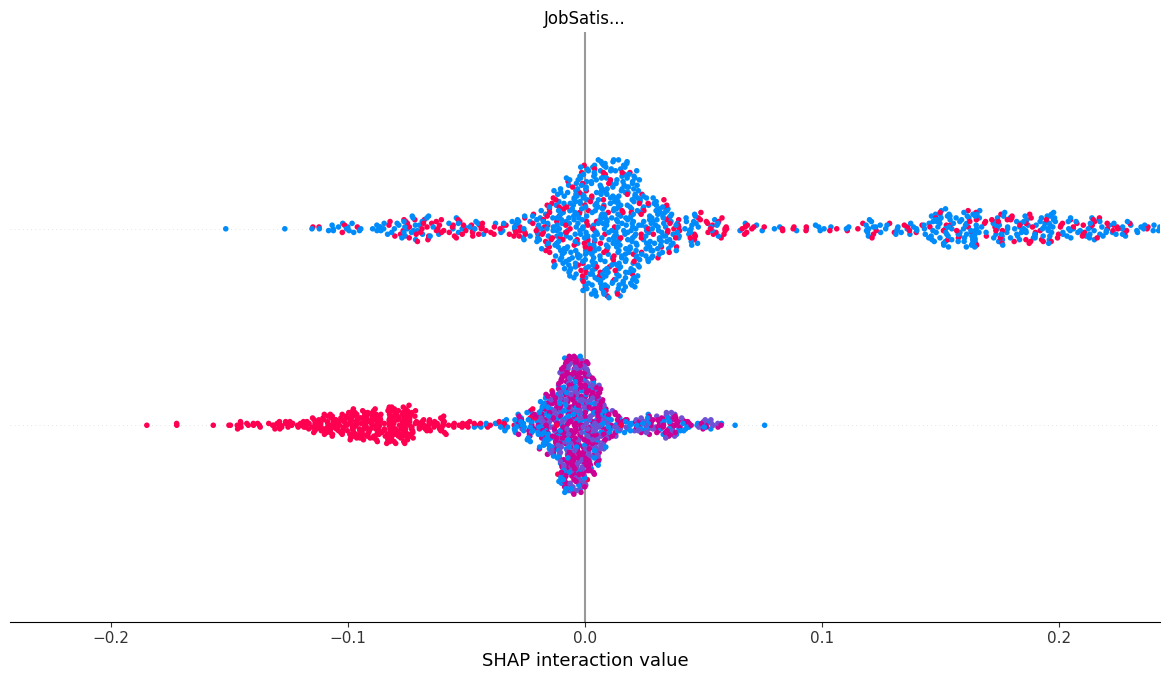

In [19]:
import shap

# Initialize SHAP explainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values_rf, X_train)


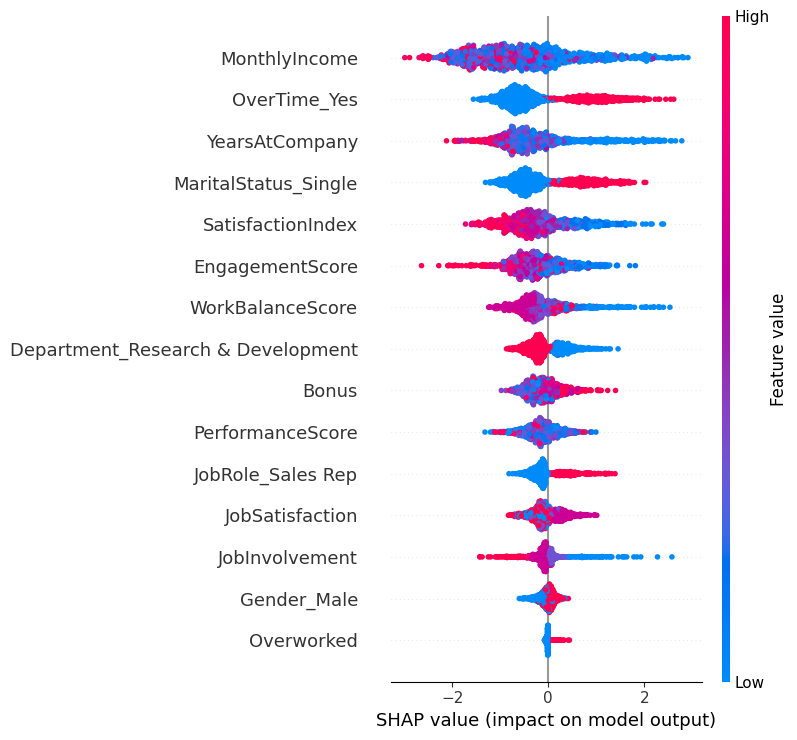

In [20]:
# Initialize SHAP explainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgboost_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Plot SHAP summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_train)


In [22]:
# Top 3 features driving attrition from Random Forest
top_rf_features = rf_importance_df.head(5)
print("Top 3 features from Random Forest:", top_rf_features)

# Top 3 features driving attrition from XGBoost
top_xgb_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgboost_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(3)
print("Top 3 features from XGBoost:", top_xgb_features)


Top 3 features from Random Forest:               Feature  Importance
6      YearsAtCompany    0.129102
11      MonthlyIncome    0.127097
3    WorkBalanceScore    0.106036
4   SatisfactionIndex    0.104507
2      JobInvolvement    0.083618
Top 3 features from XGBoost:                  Feature  Importance
0           OverTime_Yes    0.156925
10  MaritalStatus_Single    0.099634
14     JobRole_Sales Rep    0.083639


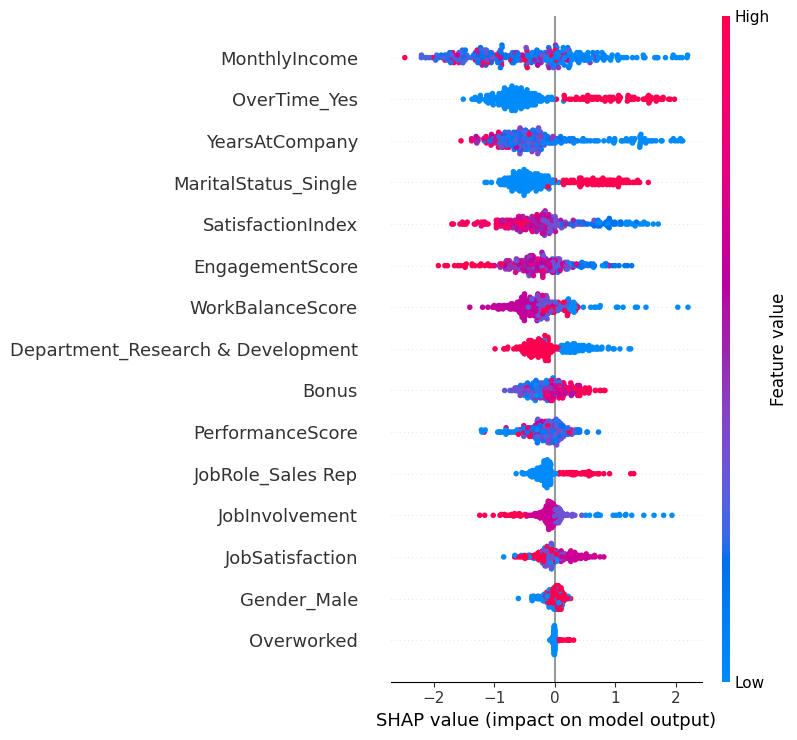

In [23]:
import shap
explainer = shap.TreeExplainer(xgboost_model)  # Replace with your trained XGBoost model
shap_values = explainer.shap_values(X_test)  # Replace X_test with your test dataset
shap.summary_plot(shap_values, X_test)  # Visualize feature importance


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')  # Auto-adjusts class weights
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [25]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced')  # Adjusts for imbalance
lr_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

Class distribution before SMOTE:
 Attrition
0    986
1    190
Name: count, dtype: int64
Class distribution after SMOTE:
 Attrition
0    986
1    986
Name: count, dtype: int64

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.72      0.82       247
           1       0.33      0.72      0.46        47

    accuracy                           0.72       294
   macro avg       0.63      0.72      0.64       294
weighted avg       0.84      0.72      0.76       294


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       247
           1       0.49      0.45      0.47        47

    accuracy                           0.84       294
   macro avg       0.69      0.68      0.69       294
weighted avg       0.83      0.84      0.83       294


XGBoost Classification Report:
               precision    recall  f1-score   support


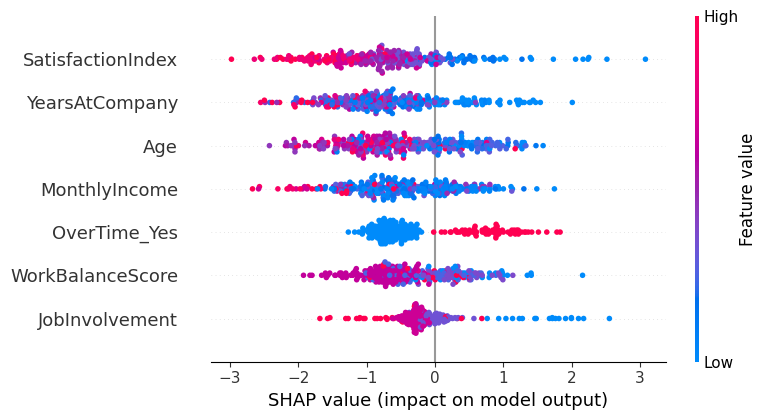


Top 3 Features Driving Attrition from Random Forest:
          Feature  Importance
2  YearsAtCompany    0.213517
0             Age    0.199090
1   MonthlyIncome    0.181285

Top 3 Features Driving Attrition from XGBoost:
             Feature  Importance
6       OverTime_Yes    0.286375
5  SatisfactionIndex    0.162924
2     YearsAtCompany    0.150905


In [26]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import shap
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load dataset (replace with actual dataset path)
#df = pd.read_csv('your_dataset.csv')

# Feature selection from EDA insights (based on your EDA findings)
# Selecting relevant features for the model based on your EDA insights
X = df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobInvolvement', 'WorkBalanceScore', 'SatisfactionIndex', 'OverTime_Yes']]
y = df['Attrition']  # Target variable

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print("Class distribution before SMOTE:\n", y_train.value_counts())

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

# Model training
# Logistic Regression with class weights
lr_model = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=20, min_samples_split=2)
rf_model.fit(X_train_smote, y_train_smote)

# XGBoost with class weights
xgb_model = xgb.XGBClassifier(scale_pos_weight=(y_train_smote.value_counts()[0] / y_train_smote.value_counts()[1]))
xgb_model.fit(X_train_smote, y_train_smote)

# Model predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

# Hyperparameter Tuning using GridSearchCV
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [10, 15, 20], 'learning_rate': [0.05, 0.1, 0.2]}

# GridSearch for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='f1')
grid_search_rf.fit(X_train_smote, y_train_smote)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# GridSearch for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='f1')
grid_search_xgb.fit(X_train_smote, y_train_smote)
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

# Feature importance analysis using Random Forest and XGBoost
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTop Features from Random Forest:\n", rf_feature_importance.head(3))

xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTop Features from XGBoost:\n", xgb_feature_importance.head(3))

# SHAP values analysis for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Final insights on top 3 factors driving attrition (use feature importance and SHAP values)
# For business insights, print the top 3 factors from Random Forest and XGBoost
top_3_rf = rf_feature_importance.head(3)
top_3_xgb = xgb_feature_importance.head(3)

print("\nTop 3 Features Driving Attrition from Random Forest:")
print(top_3_rf)

print("\nTop 3 Features Driving Attrition from XGBoost:")
print(top_3_xgb)

# Save the model with best performance (for example, Random Forest)
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

# Summary Report - Key Insights for Business
with open('business_insights_report.txt', 'w') as f:
    f.write("Key Drivers of Employee Attrition\n")
    f.write("\nRandom Forest Model - Top 3 Factors Driving Attrition:\n")
    f.write(str(top_3_rf))
    f.write("\nXGBoost Model - Top 3 Factors Driving Attrition:\n")
    f.write(str(top_3_xgb))
    f.write("\nSHAP Summary Plot and Analysis provide detailed view of individual predictions.")
